# Recopilación de toda la información obtenida

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LIMPIEZA DE DATOS

En este punto, primero hay que revisar si ya se tienen los datos necesarios, para luego unirlos

In [6]:

ub_mun=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\HABITATIONAL UNITS\UH_MUN.csv")
malls_mun=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\MALLS\Plazas_por_alcandia.csv")
est_mun=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\PARKINGS\municipios totales actualizado.csv")
#mb_mun=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\MB-STATIONS\MB_alcaldias.csv")
subest_mun=pd.read_excel(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\CFE.xlsx", header=None, names=["NOMGEO","NUM_SUB","NOMBRES"])
pobreza_mun=pd.read_excel(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\POVERTY\cuadros-dimensiones-de-nbi-por-alcaldias-2015-2020.xlsx",
                        sheet_name="USO"
                        )
mun=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\PARKINGS\municipios totales.csv")


In [7]:
mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID
0,9003,9,3,Coyoacán,1
1,9007,9,7,Iztapalapa,2
2,9008,9,8,La Magdalena Contreras,3
3,9009,9,9,Milpa Alta,4
4,9010,9,10,Álvaro Obregón,5
5,9011,9,11,Tláhuac,6
6,9012,9,12,Tlalpan,7
7,9013,9,13,Xochimilco,8
8,9006,9,6,Iztacalco,9
9,9015,9,15,Cuauhtémoc,10


In [8]:
pobreza_mun

,NOMGEO,Pobreza_Extrema,Pobreza_Gral,Pobreza_Economica,Pobreza_Calidad_Espacio_Vivienda,Pobreza_bienes_durables,Pobreza_Servicios_Sanitarios,Pobreza_Energia,Pobreza_Servicio_Telefonico,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Pobreza_Tiempo,Indice_Desarrollo_Social,Estrato_IDS
0,Azcapotzalco,10.038842,49.868357,24.2000,42.350506,29.481800,19.302942,1.178509,1.527852,17.636237,29.148040,30.102570,48.664031,0.878648,Medio
1,Coyoacán,9.831481,45.554006,27.1000,38.677293,22.192889,14.264785,1.031779,1.248649,12.669903,35.718570,33.284884,44.898783,0.876103,Medio
2,Cuajimalpa de Morelos,14.749674,53.175012,32.5000,43.870407,31.394274,25.598465,0.909602,2.343224,18.403876,41.980591,35.662156,48.431424,0.842207,Medio
3,Gustavo A. Madero,13.091695,56.513256,33.8000,48.572491,34.339685,23.082533,0.750609,1.987128,20.908291,34.648815,35.758582,48.268614,0.840080,Medio
4,Iztacalco,12.855549,53.205375,25.2000,46.707143,28.984942,20.862836,0.770433,1.262516,18.262499,34.694598,35.388982,49.194400,0.849362,Medio
5,Iztapalapa,23.235976,68.366442,43.9000,57.744646,41.518286,35.466764,1.170631,2.634182,23.333671,46.911801,50.179898,47.270604,0.802963,Bajo
6,La Magdalena Contreras,20.624153,63.324402,42.5000,56.316267,37.058290,26.812991,1.327784,2.782180,21.320514,41.340200,40.437585,42.507474,0.826904,Bajo
7,Milpa Alta,36.223992,80.012451,54.7000,69.110390,46.425505,66.526426,4.515875,4.838953,47.331171,63.646908,67.591337,57.120482,0.758239,Muy bajo
8,Álvaro Obregón,17.227193,57.622193,37.7000,51.327476,32.175732,19.055281,0.765919,1.649020,19.426469,40.266114,37.327423,45.913170,0.845527,Medio
9,Tláhuac,22.423406,67.615546,42.4000,56.874428,38.226241,41.477302,1.000010,2.305522,27.354598,47.637180,51.303199,45.181348,0.808841,Bajo


In [9]:
pobreza_estadisticos=round(pobreza_mun.drop(len(pobreza_mun)-1).describe(),2)
pobreza_estadisticos

,Pobreza_Extrema,Pobreza_Gral,Pobreza_Economica,Pobreza_Calidad_Espacio_Vivienda,Pobreza_bienes_durables,Pobreza_Servicios_Sanitarios,Pobreza_Energia,Pobreza_Servicio_Telefonico,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Pobreza_Tiempo,Indice_Desarrollo_Social
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,16.72,56.53,32.76,48.09,32.08,27.53,1.22,2.10,21.10,41.14,40.07,48.46,0.84
std,8.28,12.49,12.66,11.92,8.13,16.17,0.92,1.02,9.16,8.62,10.92,3.36,0.04
min,3.96,28.84,7.90,20.26,13.56,7.67,0.54,0.38,6.85,29.15,25.99,42.51,0.76
25%,11.55,49.21,24.95,41.43,29.36,17.86,0.77,1.48,17.25,34.68,34.01,46.66,0.82
50%,14.74,57.07,33.15,48.89,31.73,21.97,1.01,2.04,19.43,40.34,36.54,48.42,0.84
75%,21.20,64.40,42.42,56.46,37.35,36.97,1.20,2.42,23.34,46.13,46.81,49.57,0.86
max,36.22,80.01,54.70,69.11,46.43,66.53,4.52,4.84,47.33,63.65,67.59,57.12,0.93


In [10]:
ub_mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID,NUM_UH
0,9002,9,2,Azcapotzalco,12,1054.0
1,9003,9,3,Coyoacán,1,1481.0
2,9004,9,4,Cuajimalpa de Morelos,15,0.0
3,9005,9,5,Gustavo A. Madero,14,923.0
4,9006,9,6,Iztacalco,9,996.0
5,9007,9,7,Iztapalapa,2,4912.0
6,9008,9,8,La Magdalena Contreras,3,131.0
7,9009,9,9,Milpa Alta,4,0.0
8,9010,9,10,Álvaro Obregón,5,601.0
9,9011,9,11,Tláhuac,6,735.0


In [11]:
malls_mun

,ALCALDÍA,NUM_MALLS
0,Azcapotzalco,45
1,Benito Juárez,73
2,Coyoacán,76
3,Cuajimalpa,26
4,Cuauhtémoc,172
5,Gustavo A. Madero,52
6,Iztacalco,22
7,Iztapalapa,95
8,Magdalena Contreras,11
9,Miguel Hidalgo,43


In [12]:
est_mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID,EST_TOT
0,9002,9,2,Azcapotzalco,12,67
1,9003,9,3,Coyoacán,1,109
2,9004,9,4,Cuajimalpa de Morelos,15,36
3,9005,9,5,Gustavo A. Madero,14,98
4,9006,9,6,Iztacalco,9,49
5,9007,9,7,Iztapalapa,2,137
6,9008,9,8,La Magdalena Contreras,3,22
7,9009,9,9,Milpa Alta,4,9
8,9010,9,10,Álvaro Obregón,5,107
9,9011,9,11,Tláhuac,6,23


In [13]:
subest_mun

,NOMGEO,NUM_SUB,NOMBRES
0,Álvaro Obregón,2,"CFE S.E. OLIVAR, Subestación Eléctrica Tacubaya"
1,Azcapotzalco,1,Subestacion Electrica Azcapotzalco
2,Benito Juárez,2,"CFE Subestación Electrica Narvarte, CFE SUBEST..."
3,Coyoacán,2,"CFE Subestación Eléctrica Odón de Buen, CFE Su..."
4,Cuajimalpa de Morelos,1,Subestación Tren Méx-Tol CFE
5,Cuauhtémoc,4,"Subestación de CFE, Subestacion electrica Cuau..."
6,Gustavo A. Madero,3,S.E. Esmeralda. CFE Subestación Eléctrica Pera...
7,Iztacalco,0,NaN
8,Iztapalapa,3,"Subestacion Electrica Zaragoza, Subestacion El..."
9,La Magdalena Contreras,0,NaN


In [14]:
subest_mun.NUM_SUB.sum()

23

Observando las bases de datos, a la base de malls_mun hay que agregarle la clave municipal, ya que será por esta clave que se unirán todos. Además de reescribir el nombre de la columna "ALCALDÍA" a "NOMGEO"

In [15]:
mun_dic=dict(zip(mun.NOMGEO, mun.CVE_MUN))
malls_mun.rename(columns={"ALCALDÍA": "NOMGEO"}, inplace=True)
malls_mun["CVE_MUN"]=malls_mun.NOMGEO #creamos la columna donde se agregará la clave municipal, con las entradas siendo los nombres de las alcaldías
malls_mun.CVE_MUN = malls_mun.CVE_MUN.map(mun_dic)
malls_mun

,NOMGEO,NUM_MALLS,CVE_MUN
0,Azcapotzalco,45,2.0
1,Benito Juárez,73,14.0
2,Coyoacán,76,3.0
3,Cuajimalpa,26,NaN
4,Cuauhtémoc,172,15.0
5,Gustavo A. Madero,52,5.0
6,Iztacalco,22,6.0
7,Iztapalapa,95,7.0
8,Magdalena Contreras,11,NaN
9,Miguel Hidalgo,43,16.0


Como puede observarse, la clave municipal está en un formato float, por lo que hay que convertirlo a int. Además hay que cambiar el nombre de cuajimalpa a Cuajimalpla de Morelos

In [16]:
malls_mun.NOMGEO.replace("Cuajimalpa", "Cuajimalpa de Morelos", inplace=True)
malls_mun.NOMGEO.replace("Tlahuac", "Tláhuac",inplace=True)
malls_mun.NOMGEO.replace("Magdalena Contreras", "La Magdalena Contreras",inplace=True)
malls_mun

,NOMGEO,NUM_MALLS,CVE_MUN
0,Azcapotzalco,45,2.0
1,Benito Juárez,73,14.0
2,Coyoacán,76,3.0
3,Cuajimalpa de Morelos,26,NaN
4,Cuauhtémoc,172,15.0
5,Gustavo A. Madero,52,5.0
6,Iztacalco,22,6.0
7,Iztapalapa,95,7.0
8,La Magdalena Contreras,11,NaN
9,Miguel Hidalgo,43,16.0


In [17]:
malls_mun["CVE_MUN"]=malls_mun.NOMGEO #creamos la columna donde se agregará la clave municipal, con las entradas siendo los nombres de las alcaldías
malls_mun.CVE_MUN = malls_mun.CVE_MUN.map(mun_dic)
malls_mun

,NOMGEO,NUM_MALLS,CVE_MUN
0,Azcapotzalco,45,2
1,Benito Juárez,73,14
2,Coyoacán,76,3
3,Cuajimalpa de Morelos,26,4
4,Cuauhtémoc,172,15
5,Gustavo A. Madero,52,5
6,Iztacalco,22,6
7,Iztapalapa,95,7
8,La Magdalena Contreras,11,8
9,Miguel Hidalgo,43,16


Al arreglar las alcaldías mal escritas, el tipo de dato se convirtió automáticamente a entero y se llenaron completamente las claves municipales. Ya no hay datos vacíos

In [18]:
malls_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NOMGEO     16 non-null     object
 1   NUM_MALLS  16 non-null     int64 
 2   CVE_MUN    16 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 516.0+ bytes


In [19]:
mun.sort_values("NOMGEO",inplace=True)
ub_mun.sort_values("NOMGEO",inplace=True)
malls_mun.sort_values("NOMGEO",inplace=True)
est_mun.sort_values("NOMGEO",inplace=True)

mun.reset_index(drop=True, inplace=True)
malls_mun.reset_index(drop=True, inplace=True)
est_mun.reset_index(drop=True, inplace=True)
ub_mun.reset_index(drop=True, inplace=True)

In [20]:
mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID
0,9002,9,2,Azcapotzalco,12
1,9014,9,14,Benito Juárez,16
2,9003,9,3,Coyoacán,1
3,9004,9,4,Cuajimalpa de Morelos,15
4,9015,9,15,Cuauhtémoc,10
5,9005,9,5,Gustavo A. Madero,14
6,9006,9,6,Iztacalco,9
7,9007,9,7,Iztapalapa,2
8,9008,9,8,La Magdalena Contreras,3
9,9016,9,16,Miguel Hidalgo,13


In [21]:
ub_mun=ub_mun.astype({"NUM_UH":"int64"})
ub_mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID,NUM_UH
0,9002,9,2,Azcapotzalco,12,1054
1,9014,9,14,Benito Juárez,16,210
2,9003,9,3,Coyoacán,1,1481
3,9004,9,4,Cuajimalpa de Morelos,15,0
4,9015,9,15,Cuauhtémoc,10,679
5,9005,9,5,Gustavo A. Madero,14,923
6,9006,9,6,Iztacalco,9,996
7,9007,9,7,Iztapalapa,2,4912
8,9008,9,8,La Magdalena Contreras,3,131
9,9016,9,16,Miguel Hidalgo,13,525


In [22]:
est_mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID,EST_TOT
0,9002,9,2,Azcapotzalco,12,67
1,9014,9,14,Benito Juárez,16,287
2,9003,9,3,Coyoacán,1,109
3,9004,9,4,Cuajimalpa de Morelos,15,36
4,9015,9,15,Cuauhtémoc,10,799
5,9005,9,5,Gustavo A. Madero,14,98
6,9006,9,6,Iztacalco,9,49
7,9007,9,7,Iztapalapa,2,137
8,9008,9,8,La Magdalena Contreras,3,22
9,9016,9,16,Miguel Hidalgo,13,290


In [23]:
malls_mun

,NOMGEO,NUM_MALLS,CVE_MUN
0,Azcapotzalco,45,2
1,Benito Juárez,73,14
2,Coyoacán,76,3
3,Cuajimalpa de Morelos,26,4
4,Cuauhtémoc,172,15
5,Gustavo A. Madero,52,5
6,Iztacalco,22,6
7,Iztapalapa,95,7
8,La Magdalena Contreras,11,8
9,Miguel Hidalgo,43,16


In [24]:
subest_mun.drop(columns="NOMBRES", inplace=True)
subest_mun

,NOMGEO,NUM_SUB
0,Álvaro Obregón,2
1,Azcapotzalco,1
2,Benito Juárez,2
3,Coyoacán,2
4,Cuajimalpa de Morelos,1
5,Cuauhtémoc,4
6,Gustavo A. Madero,3
7,Iztacalco,0
8,Iztapalapa,3
9,La Magdalena Contreras,0


In [25]:
pobreza_mun.drop(len(pobreza_mun)-1, inplace=True)
pobreza_mun.drop(columns=["Pobreza_Gral","Pobreza_Calidad_Espacio_Vivienda","Pobreza_Servicios_Sanitarios","Pobreza_Servicio_Telefonico","Pobreza_Tiempo","Estrato_IDS"], inplace=True)
pobreza_mun

,NOMGEO,Pobreza_Extrema,Pobreza_Economica,Pobreza_bienes_durables,Pobreza_Energia,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Indice_Desarrollo_Social
0,Azcapotzalco,10.038842,24.2,29.481800,1.178509,17.636237,29.148040,30.102570,0.878648
1,Coyoacán,9.831481,27.1,22.192889,1.031779,12.669903,35.718570,33.284884,0.876103
2,Cuajimalpa de Morelos,14.749674,32.5,31.394274,0.909602,18.403876,41.980591,35.662156,0.842207
3,Gustavo A. Madero,13.091695,33.8,34.339685,0.750609,20.908291,34.648815,35.758582,0.840080
4,Iztacalco,12.855549,25.2,28.984942,0.770433,18.262499,34.694598,35.388982,0.849362
5,Iztapalapa,23.235976,43.9,41.518286,1.170631,23.333671,46.911801,50.179898,0.802963
6,La Magdalena Contreras,20.624153,42.5,37.058290,1.327784,21.320514,41.340200,40.437585,0.826904
7,Milpa Alta,36.223992,54.7,46.425505,4.515875,47.331171,63.646908,67.591337,0.758239
8,Álvaro Obregón,17.227193,37.7,32.175732,0.765919,19.426469,40.266114,37.327423,0.845527
9,Tláhuac,22.423406,42.4,38.226241,1.000010,27.354598,47.637180,51.303199,0.808841


# UNIÓN DE DATOS

En esta parte ya se tienen limpios los datos y ajustados a las necesidades, por lo que es momento de unirlos

In [26]:
full_data=mun.merge(malls_mun, on=["NOMGEO","CVE_MUN"])
full_data=full_data.merge(est_mun,on=["CVE_MUN","NOMGEO","CVEGEO","CVE_ENT","OID"])
full_data=full_data.merge(ub_mun,on=["CVE_MUN","NOMGEO","CVEGEO","CVE_ENT","OID"])
full_data=full_data.merge(subest_mun,on=["NOMGEO"])
full_data=full_data.merge(pobreza_mun,on=["NOMGEO"])
full_data.drop(columns=["OID"], inplace=True)
full_data.sort_values("CVE_MUN", inplace=True)
full_data.reset_index(drop=False,inplace=True)
full_data

,index,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NUM_MALLS,EST_TOT,NUM_UH,NUM_SUB,Pobreza_Extrema,Pobreza_Economica,Pobreza_bienes_durables,Pobreza_Energia,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Indice_Desarrollo_Social
0,0,9002,9,2,Azcapotzalco,45,67,1054,1,10.038842,24.2,29.481800,1.178509,17.636237,29.148040,30.102570,0.878648
1,2,9003,9,3,Coyoacán,76,109,1481,2,9.831481,27.1,22.192889,1.031779,12.669903,35.718570,33.284884,0.876103
2,3,9004,9,4,Cuajimalpa de Morelos,26,36,0,1,14.749674,32.5,31.394274,0.909602,18.403876,41.980591,35.662156,0.842207
3,5,9005,9,5,Gustavo A. Madero,52,98,923,3,13.091695,33.8,34.339685,0.750609,20.908291,34.648815,35.758582,0.840080
4,6,9006,9,6,Iztacalco,22,49,996,0,12.855549,25.2,28.984942,0.770433,18.262499,34.694598,35.388982,0.849362
5,7,9007,9,7,Iztapalapa,95,137,4912,3,23.235976,43.9,41.518286,1.170631,23.333671,46.911801,50.179898,0.802963
6,8,9008,9,8,La Magdalena Contreras,11,22,131,0,20.624153,42.5,37.058290,1.327784,21.320514,41.340200,40.437585,0.826904
7,10,9009,9,9,Milpa Alta,2,9,0,0,36.223992,54.7,46.425505,4.515875,47.331171,63.646908,67.591337,0.758239
8,15,9010,9,10,Álvaro Obregón,84,107,601,2,17.227193,37.7,32.175732,0.765919,19.426469,40.266114,37.327423,0.845527
9,12,9011,9,11,Tláhuac,13,23,735,0,22.423406,42.4,38.226241,1.000010,27.354598,47.637180,51.303199,0.808841


In [27]:
ponderaciones=full_data.copy()
ponderaciones

,index,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NUM_MALLS,EST_TOT,NUM_UH,NUM_SUB,Pobreza_Extrema,Pobreza_Economica,Pobreza_bienes_durables,Pobreza_Energia,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Indice_Desarrollo_Social
0,0,9002,9,2,Azcapotzalco,45,67,1054,1,10.038842,24.2,29.481800,1.178509,17.636237,29.148040,30.102570,0.878648
1,2,9003,9,3,Coyoacán,76,109,1481,2,9.831481,27.1,22.192889,1.031779,12.669903,35.718570,33.284884,0.876103
2,3,9004,9,4,Cuajimalpa de Morelos,26,36,0,1,14.749674,32.5,31.394274,0.909602,18.403876,41.980591,35.662156,0.842207
3,5,9005,9,5,Gustavo A. Madero,52,98,923,3,13.091695,33.8,34.339685,0.750609,20.908291,34.648815,35.758582,0.840080
4,6,9006,9,6,Iztacalco,22,49,996,0,12.855549,25.2,28.984942,0.770433,18.262499,34.694598,35.388982,0.849362
5,7,9007,9,7,Iztapalapa,95,137,4912,3,23.235976,43.9,41.518286,1.170631,23.333671,46.911801,50.179898,0.802963
6,8,9008,9,8,La Magdalena Contreras,11,22,131,0,20.624153,42.5,37.058290,1.327784,21.320514,41.340200,40.437585,0.826904
7,10,9009,9,9,Milpa Alta,2,9,0,0,36.223992,54.7,46.425505,4.515875,47.331171,63.646908,67.591337,0.758239
8,15,9010,9,10,Álvaro Obregón,84,107,601,2,17.227193,37.7,32.175732,0.765919,19.426469,40.266114,37.327423,0.845527
9,12,9011,9,11,Tláhuac,13,23,735,0,22.423406,42.4,38.226241,1.000010,27.354598,47.637180,51.303199,0.808841


In [28]:
l=ponderaciones.query("NUM_UH <= 400").NUM_UH.tolist()
ponderaciones.NUM_UH.replace(l,1, inplace=True)

l=ponderaciones.query("NUM_UH>=401 & NUM_UH <= 800").NUM_UH.tolist()
ponderaciones.NUM_UH.replace(l,2, inplace=True)

l=ponderaciones.query("NUM_UH>=801 & NUM_UH <= 1200").NUM_UH.tolist()
ponderaciones.NUM_UH.replace(l,3, inplace=True)

l=ponderaciones.query("NUM_UH>=1201 & NUM_UH <= 1600").NUM_UH.tolist()
ponderaciones.NUM_UH.replace(l,4, inplace=True)

l=ponderaciones.query("NUM_UH>1600").NUM_UH.tolist()
ponderaciones.NUM_UH.replace(l,5, inplace=True)









l=ponderaciones.query("NUM_MALLS<=40").NUM_MALLS.tolist()
ponderaciones.NUM_MALLS.replace(l,1, inplace=True)

l=ponderaciones.query("NUM_MALLS>=41 & NUM_MALLS<=80").NUM_MALLS.tolist()
ponderaciones.NUM_MALLS.replace(l,2, inplace=True)

l=ponderaciones.query("NUM_MALLS>=81 & NUM_MALLS<=120").NUM_MALLS.tolist()
ponderaciones.NUM_MALLS.replace(l,3, inplace=True)

l=ponderaciones.query("NUM_MALLS>=121 & NUM_MALLS<=160").NUM_MALLS.tolist()
ponderaciones.NUM_MALLS.replace(l,4, inplace=True)

l=ponderaciones.query("NUM_MALLS>160").NUM_MALLS.tolist()
ponderaciones.NUM_MALLS.replace(l,5, inplace=True)





l=ponderaciones.query("EST_TOT<=75").EST_TOT.tolist()
ponderaciones.EST_TOT.replace(l,1, inplace=True)

l=ponderaciones.query("EST_TOT>=76 & EST_TOT<=150").EST_TOT.tolist()
ponderaciones.EST_TOT.replace(l,2, inplace=True)

l=ponderaciones.query("EST_TOT>=151 & EST_TOT<=225").EST_TOT.tolist()
ponderaciones.EST_TOT.replace(l,3, inplace=True)

l=ponderaciones.query("EST_TOT>=226 & EST_TOT<=300").EST_TOT.tolist()
ponderaciones.EST_TOT.replace(l,4, inplace=True)

l=ponderaciones.query("EST_TOT>=300").EST_TOT.tolist()
ponderaciones.EST_TOT.replace(l,5, inplace=True)






l=ponderaciones.query("NUM_SUB == 4").NUM_SUB.tolist()
ponderaciones.NUM_SUB.replace(l,5, inplace=True)

l=ponderaciones.query("NUM_SUB == 3").NUM_SUB.tolist()
ponderaciones.NUM_SUB.replace(l,4, inplace=True)

l=ponderaciones.query("NUM_SUB == 2").NUM_SUB.tolist()
ponderaciones.NUM_SUB.replace(l,3, inplace=True)

l=ponderaciones.query("NUM_SUB == 1").NUM_SUB.tolist()
ponderaciones.NUM_SUB.replace(l,2, inplace=True)

l=ponderaciones.query("NUM_SUB == 0").NUM_SUB.tolist()
ponderaciones.NUM_SUB.replace(l,1, inplace=True)




l=ponderaciones.query("Pobreza_Extrema <=10.41").Pobreza_Extrema.tolist()
ponderaciones.Pobreza_Extrema.replace(l,5, inplace=True)

l=ponderaciones.query("Pobreza_Extrema >=10.42 & Pobreza_Extrema <=16.86").Pobreza_Extrema.tolist()
ponderaciones.Pobreza_Extrema.replace(l,4, inplace=True)

l=ponderaciones.query("Pobreza_Extrema >=16.87 & Pobreza_Extrema <=23.32").Pobreza_Extrema.tolist()
ponderaciones.Pobreza_Extrema.replace(l,3, inplace=True)

l=ponderaciones.query("Pobreza_Extrema >=23.32 & Pobreza_Extrema <=29.79").Pobreza_Extrema.tolist()
ponderaciones.Pobreza_Extrema.replace(l,2, inplace=True)

l=ponderaciones.query("Pobreza_Extrema >=29.77").Pobreza_Extrema.tolist()
ponderaciones.Pobreza_Extrema.replace(l,1, inplace=True)





l = ponderaciones.query("Pobreza_Economica <= 17.26").Pobreza_Economica.tolist()
ponderaciones.Pobreza_Economica.replace(l,5, inplace=True)

l = ponderaciones.query("Pobreza_Economica > 17.26 & Pobreza_Economica <= 26.62").Pobreza_Economica.tolist()
ponderaciones.Pobreza_Economica.replace(l,4, inplace=True)

l = ponderaciones.query("Pobreza_Economica > 26.62 & Pobreza_Economica <= 35.98").Pobreza_Economica.tolist()
ponderaciones.Pobreza_Economica.replace(l,3, inplace=True)

l = ponderaciones.query("Pobreza_Economica > 35.98 & Pobreza_Economica <= 45.34").Pobreza_Economica.tolist()
ponderaciones.Pobreza_Economica.replace(l,2, inplace=True)

l = ponderaciones.query("Pobreza_Economica > 45.34").Pobreza_Economica.tolist()
ponderaciones.Pobreza_Economica.replace(l,1, inplace=True)




l = ponderaciones.query("Pobreza_bienes_durables <= 20.13").Pobreza_bienes_durables.tolist()
ponderaciones.Pobreza_bienes_durables.replace(l,5, inplace=True)

l = ponderaciones.query("Pobreza_bienes_durables > 20.13 & Pobreza_bienes_durables <= 26.71").Pobreza_bienes_durables.tolist()
ponderaciones.Pobreza_bienes_durables.replace(l,4, inplace=True)

l = ponderaciones.query("Pobreza_bienes_durables > 26.71 & Pobreza_bienes_durables <= 33.28").Pobreza_bienes_durables.tolist()
ponderaciones.Pobreza_bienes_durables.replace(l,3, inplace=True)

l = ponderaciones.query("Pobreza_bienes_durables > 33.28 & Pobreza_bienes_durables <= 39.86").Pobreza_bienes_durables.tolist()
ponderaciones.Pobreza_bienes_durables.replace(l,2, inplace=True)

l = ponderaciones.query("Pobreza_bienes_durables > 29.87").Pobreza_bienes_durables.tolist()
ponderaciones.Pobreza_bienes_durables.replace(l,1, inplace=True)







l = ponderaciones.query("Pobreza_Energia <= 1.34").Pobreza_Energia.tolist()
ponderaciones.Pobreza_Energia.replace(l,5, inplace=True)

l = ponderaciones.query("Pobreza_Energia > 1.34 & Pobreza_Energia <= 2.13").Pobreza_Energia.tolist()
ponderaciones.Pobreza_Energia.replace(l,4, inplace=True)

l = ponderaciones.query("Pobreza_Energia > 2.13 & Pobreza_Energia <= 2.93").Pobreza_Energia.tolist()
ponderaciones.Pobreza_Energia.replace(l,3, inplace=True)

l = ponderaciones.query("Pobreza_Energia > 2.93 & Pobreza_Energia <= 3.72").Pobreza_Energia.tolist()
ponderaciones.Pobreza_Energia.replace(l,2, inplace=True)

l = ponderaciones.query("Pobreza_Energia > 3.72 & Pobreza_Energia <= 4.52").Pobreza_Energia.tolist()
ponderaciones.Pobreza_Energia.replace(l,1, inplace=True)






l = ponderaciones.query("Pobreza_Internet <= 14.95").Pobreza_Internet.tolist()
ponderaciones.Pobreza_Internet.replace(l,5, inplace=True)

l = ponderaciones.query("Pobreza_Internet > 14.95 & Pobreza_Internet<=23.04").Pobreza_Internet.tolist()
ponderaciones.Pobreza_Internet.replace(l,4, inplace=True)

l = ponderaciones.query("Pobreza_Internet > 23.04 & Pobreza_Internet<=31.14").Pobreza_Internet.tolist()
ponderaciones.Pobreza_Internet.replace(l,3, inplace=True)

l = ponderaciones.query("Pobreza_Internet > 31.14 & Pobreza_Internet<=39.23").Pobreza_Internet.tolist()
ponderaciones.Pobreza_Internet.replace(l,2, inplace=True)

l = ponderaciones.query("Pobreza_Internet > 39.23").Pobreza_Internet.tolist()
ponderaciones.Pobreza_Internet.replace(l,1, inplace=True)




l = ponderaciones.query("Pobreza_Seguridad_Social <= 36.05").Pobreza_Seguridad_Social.tolist()
ponderaciones.Pobreza_Seguridad_Social.replace(l,5, inplace=True)

l = ponderaciones.query("Pobreza_Seguridad_Social > 36.05 & Pobreza_Seguridad_Social <= 42.95").Pobreza_Seguridad_Social.tolist()
ponderaciones.Pobreza_Seguridad_Social.replace(l,4, inplace=True)

l = ponderaciones.query("Pobreza_Seguridad_Social > 42.95 & Pobreza_Seguridad_Social <= 49.85").Pobreza_Seguridad_Social.tolist()
ponderaciones.Pobreza_Seguridad_Social.replace(l,3, inplace=True)

l = ponderaciones.query("Pobreza_Seguridad_Social > 49.85 & Pobreza_Seguridad_Social <= 56.75").Pobreza_Seguridad_Social.tolist()
ponderaciones.Pobreza_Seguridad_Social.replace(l,2, inplace=True)

l = ponderaciones.query("Pobreza_Seguridad_Social > 56.76").Pobreza_Seguridad_Social.tolist()
ponderaciones.Pobreza_Seguridad_Social.replace(l,1, inplace=True)






l = ponderaciones.query("Pobreza_Servicios_Salud <= 34.31").Pobreza_Servicios_Salud.tolist()
ponderaciones.Pobreza_Servicios_Salud.replace(l,5, inplace=True)

l = ponderaciones.query("Pobreza_Servicios_Salud > 34.31 & Pobreza_Servicios_Salud <= 42.63").Pobreza_Servicios_Salud.tolist()
ponderaciones.Pobreza_Servicios_Salud.replace(l,4, inplace=True)

l = ponderaciones.query("Pobreza_Servicios_Salud > 42.63 & Pobreza_Servicios_Salud <= 50.95").Pobreza_Servicios_Salud.tolist()
ponderaciones.Pobreza_Servicios_Salud.replace(l,3, inplace=True)

l = ponderaciones.query("Pobreza_Servicios_Salud > 50.95 & Pobreza_Servicios_Salud <= 59.27").Pobreza_Servicios_Salud.tolist()
ponderaciones.Pobreza_Servicios_Salud.replace(l,2, inplace=True)

l = ponderaciones.query("Pobreza_Servicios_Salud > 59.27").Pobreza_Servicios_Salud.tolist()
ponderaciones.Pobreza_Servicios_Salud.replace(l,1, inplace=True)




l = ponderaciones.query("Indice_Desarrollo_Social < 0.79")["Indice_Desarrollo_Social"].tolist()
ponderaciones["Indice_Desarrollo_Social"].replace(l,1, inplace=True)

l = ponderaciones.query("Indice_Desarrollo_Social > 0.79 & Indice_Desarrollo_Social <= 0.83")["Indice_Desarrollo_Social"].tolist()
ponderaciones["Indice_Desarrollo_Social"].replace(l,2, inplace=True)

l = ponderaciones.query("Indice_Desarrollo_Social > 0.83 & Indice_Desarrollo_Social <= 0.86")["Indice_Desarrollo_Social"].tolist()
ponderaciones["Indice_Desarrollo_Social"].replace(l,3, inplace=True)

l = ponderaciones.query("Indice_Desarrollo_Social > 0.86 & Indice_Desarrollo_Social <= 0.90")["Indice_Desarrollo_Social"].tolist()
ponderaciones["Indice_Desarrollo_Social"].replace(l,4, inplace=True)

l = ponderaciones.query("Indice_Desarrollo_Social > 0.90 & Indice_Desarrollo_Social < 1")["Indice_Desarrollo_Social"].tolist()
ponderaciones["Indice_Desarrollo_Social"].replace(l,5, inplace=True)



ponderaciones

,index,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NUM_MALLS,EST_TOT,NUM_UH,NUM_SUB,Pobreza_Extrema,Pobreza_Economica,Pobreza_bienes_durables,Pobreza_Energia,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Indice_Desarrollo_Social
0,0,9002,9,2,Azcapotzalco,2,1,3,2,5.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0
1,2,9003,9,3,Coyoacán,2,2,4,3,5.0,3.0,4.0,5.0,5.0,5.0,5.0,4.0
2,3,9004,9,4,Cuajimalpa de Morelos,1,1,1,2,4.0,3.0,3.0,5.0,4.0,4.0,4.0,3.0
3,5,9005,9,5,Gustavo A. Madero,2,2,3,4,4.0,3.0,2.0,5.0,4.0,5.0,4.0,3.0
4,6,9006,9,6,Iztacalco,1,1,3,1,4.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0
5,7,9007,9,7,Iztapalapa,3,2,5,4,3.0,2.0,1.0,5.0,3.0,3.0,3.0,2.0
6,8,9008,9,8,La Magdalena Contreras,1,1,1,1,3.0,2.0,2.0,5.0,4.0,4.0,4.0,2.0
7,10,9009,9,9,Milpa Alta,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,15,9010,9,10,Álvaro Obregón,3,2,2,3,3.0,2.0,3.0,5.0,4.0,4.0,4.0,3.0
9,12,9011,9,11,Tláhuac,1,1,2,1,3.0,2.0,2.0,5.0,3.0,3.0,2.0,2.0


In [29]:
ponderaciones["rate"]=round( (0.15*ponderaciones.NUM_MALLS + 
                             0.15*ponderaciones.EST_TOT + 
                             0.15*ponderaciones.NUM_UH + 
                             0.05*ponderaciones.NUM_SUB +
                             0.15*ponderaciones.Pobreza_Extrema +
                             0.15*ponderaciones.Pobreza_Economica +
                             0.05*ponderaciones.Pobreza_Seguridad_Social +
                             0.05*ponderaciones.Pobreza_Servicios_Salud +
                             0.10*ponderaciones.Indice_Desarrollo_Social)/5,2)                             
                             
                            
ponderaciones["rate_100"]=100*ponderaciones.rate
ponderaciones

,index,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NUM_MALLS,EST_TOT,NUM_UH,NUM_SUB,Pobreza_Extrema,Pobreza_Economica,Pobreza_bienes_durables,Pobreza_Energia,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Indice_Desarrollo_Social,rate,rate_100
0,0,9002,9,2,Azcapotzalco,2,1,3,2,5.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,0.65,65.0
1,2,9003,9,3,Coyoacán,2,2,4,3,5.0,3.0,4.0,5.0,5.0,5.0,5.0,4.0,0.69,69.0
2,3,9004,9,4,Cuajimalpa de Morelos,1,1,1,2,4.0,3.0,3.0,5.0,4.0,4.0,4.0,3.0,0.46,46.0
3,5,9005,9,5,Gustavo A. Madero,2,2,3,4,4.0,3.0,2.0,5.0,4.0,5.0,4.0,3.0,0.61,61.0
4,6,9006,9,6,Iztacalco,1,1,3,1,4.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0,0.55,55.0
5,7,9007,9,7,Iztapalapa,3,2,5,4,3.0,2.0,1.0,5.0,3.0,3.0,3.0,2.0,0.59,59.0
6,8,9008,9,8,La Magdalena Contreras,1,1,1,1,3.0,2.0,2.0,5.0,4.0,4.0,4.0,2.0,0.37,37.0
7,10,9009,9,9,Milpa Alta,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.20,20.0
8,15,9010,9,10,Álvaro Obregón,3,2,2,3,3.0,2.0,3.0,5.0,4.0,4.0,4.0,3.0,0.53,53.0
9,12,9011,9,11,Tláhuac,1,1,2,1,3.0,2.0,2.0,5.0,3.0,3.0,2.0,2.0,0.37,37.0


In [30]:
claves=["002","003","004","005","006","007","008","009","010","011","012","013","014","015","016","017"]
ponderaciones.CVE_MUN=ponderaciones.CVE_MUN.replace(list(range(2,18,1)),claves)
ponderaciones

,index,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NUM_MALLS,EST_TOT,NUM_UH,NUM_SUB,Pobreza_Extrema,Pobreza_Economica,Pobreza_bienes_durables,Pobreza_Energia,Pobreza_Internet,Pobreza_Seguridad_Social,Pobreza_Servicios_Salud,Indice_Desarrollo_Social,rate,rate_100
0,0,9002,9,002,Azcapotzalco,2,1,3,2,5.0,4.0,3.0,5.0,4.0,5.0,5.0,4.0,0.65,65.0
1,2,9003,9,003,Coyoacán,2,2,4,3,5.0,3.0,4.0,5.0,5.0,5.0,5.0,4.0,0.69,69.0
2,3,9004,9,004,Cuajimalpa de Morelos,1,1,1,2,4.0,3.0,3.0,5.0,4.0,4.0,4.0,3.0,0.46,46.0
3,5,9005,9,005,Gustavo A. Madero,2,2,3,4,4.0,3.0,2.0,5.0,4.0,5.0,4.0,3.0,0.61,61.0
4,6,9006,9,006,Iztacalco,1,1,3,1,4.0,4.0,3.0,5.0,4.0,5.0,4.0,3.0,0.55,55.0
5,7,9007,9,007,Iztapalapa,3,2,5,4,3.0,2.0,1.0,5.0,3.0,3.0,3.0,2.0,0.59,59.0
6,8,9008,9,008,La Magdalena Contreras,1,1,1,1,3.0,2.0,2.0,5.0,4.0,4.0,4.0,2.0,0.37,37.0
7,10,9009,9,009,Milpa Alta,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.20,20.0
8,15,9010,9,010,Álvaro Obregón,3,2,2,3,3.0,2.0,3.0,5.0,4.0,4.0,4.0,3.0,0.53,53.0
9,12,9011,9,011,Tláhuac,1,1,2,1,3.0,2.0,2.0,5.0,3.0,3.0,2.0,2.0,0.37,37.0


In [31]:
ponderaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     16 non-null     int64  
 1   CVEGEO                    16 non-null     int64  
 2   CVE_ENT                   16 non-null     int64  
 3   CVE_MUN                   16 non-null     object 
 4   NOMGEO                    16 non-null     object 
 5   NUM_MALLS                 16 non-null     int64  
 6   EST_TOT                   16 non-null     int64  
 7   NUM_UH                    16 non-null     int64  
 8   NUM_SUB                   16 non-null     int64  
 9   Pobreza_Extrema           16 non-null     float64
 10  Pobreza_Economica         16 non-null     float64
 11  Pobreza_bienes_durables   16 non-null     float64
 12  Pobreza_Energia           16 non-null     float64
 13  Pobreza_Internet          16 non-null     float64
 14  Pobreza_Segu

In [32]:
ponderaciones.to_csv("Ponderaciones_municipio.csv", index=False)

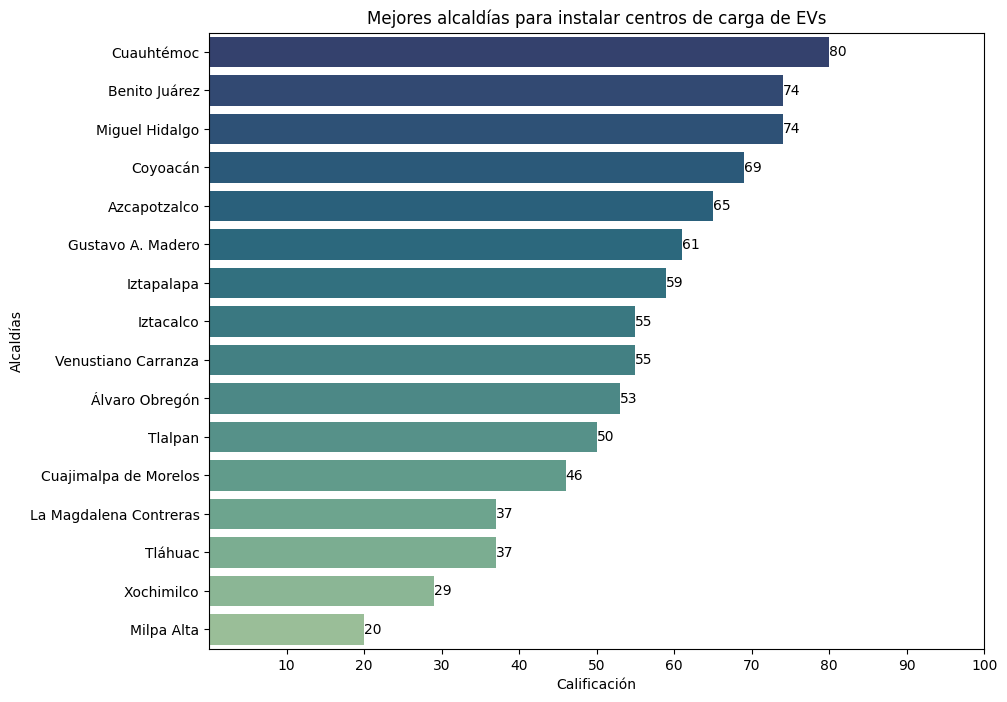

In [33]:
plt.figure(figsize=((10,8)))
fig=sns.barplot(
    data=ponderaciones.sort_values("rate_100", ascending=False), 
    x="rate_100", 
    y="NOMGEO",
    palette="crest_r"
    )
for i in fig.containers:
    fig.bar_label(i,)
fig.set_title("Mejores alcaldías para instalar centros de carga de EVs")
fig.set_xlabel("Calificación")
fig.set_ylabel("Alcaldías")
plt.xticks(ticks=list(range(10,110,10)))
plt.show()

In [34]:
100*(full_data[(full_data.NOMGEO == "Cuauhtémoc") | (full_data.NOMGEO == "Iztapalapa") | (full_data.NOMGEO == "Álvaro Obregón") ]).NUM_MALLS.sum()/full_data.NUM_MALLS.sum()

42.1875

In [35]:
100*full_data[full_data.NOMGEO == "Iztapalapa"].NUM_UH.sum()/full_data.NUM_UH.sum()

34.43875762462315

In [37]:
full_data.Pobreza_Economica.mean()

32.7625

In [38]:
full_data.Pobreza_Economica.std()

12.662483958528833

In [43]:
full_data.Pobreza_Economica.mode()

0      7.9
1     13.5
2     20.9
3     24.2
4     25.2
5     27.1
6     30.0
7     32.5
8     33.8
9     37.7
10    39.7
11    42.4
12    42.5
13    43.9
14    48.2
15    54.7
Name: Pobreza_Economica, dtype: float64